<a href="https://colab.research.google.com/github/szhang12345/MSDS-462/blob/main/week3/Assignment_3_Google_Cloud_Vision_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install required python libraries:

In [ ]:
!pip install --upgrade google-cloud-vision
!pip install --upgrade google-cloud-speech
!pip install --upgrade google-cloud-language
!pip install --upgrade google-cloud-texttospeech

### Upload Service Account Key File:

In [ ]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving rare-truck-327918-f0b9a858f64c.json to rare-truck-327918-f0b9a858f64c.json
User uploaded file "rare-truck-327918-f0b9a858f64c.json" with length 2320 bytes


### Set Enivornment Variable so Libraries can find Service Account Key:

Note: Make sure to change the file name to your file name!

In [ ]:
import os

# Imports Credential File:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "rare-truck-327918-f0b9a858f64c.json"
print("Service Account Key: {}".format(os.environ["GOOGLE_APPLICATION_CREDENTIALS"]))

Service Account Key: rare-truck-327918-f0b9a858f64c.json


## Cloud Vision

### Print Labels:

In [ ]:
def labelAnnotation(url):
  # Imports the Google Cloud client library
  from google.cloud import vision_v1
  from google.cloud.vision_v1 import types
  # Instantiates a client
  client = vision_v1.ImageAnnotatorClient()

  response = client.annotate_image({
     'image': {'source': 
               {'image_uri': url}
              },
  })

  # Detect and Print Labels:
  labels = response.label_annotations
  print("Labels: ")
  for label in labels:
    print("Description: ", label.description, "Confidence: ", label.score)
  
labelAnnotation("gs://cloud-samples-data/vision/label/setagaya.jpeg")

Labels: 
Description:  Bicycle Confidence:  0.969921886920929
Description:  Tire Confidence:  0.9678735733032227
Description:  Wheel Confidence:  0.9505612254142761
Description:  Automotive lighting Confidence:  0.9101130366325378
Description:  Infrastructure Confidence:  0.8910391926765442
Description:  Bicycle wheel Confidence:  0.8865901231765747
Description:  Building Confidence:  0.8703363537788391
Description:  Mode of transport Confidence:  0.8591277003288269
Description:  Electricity Confidence:  0.8444889783859253
Description:  Vehicle Confidence:  0.8319911956787109


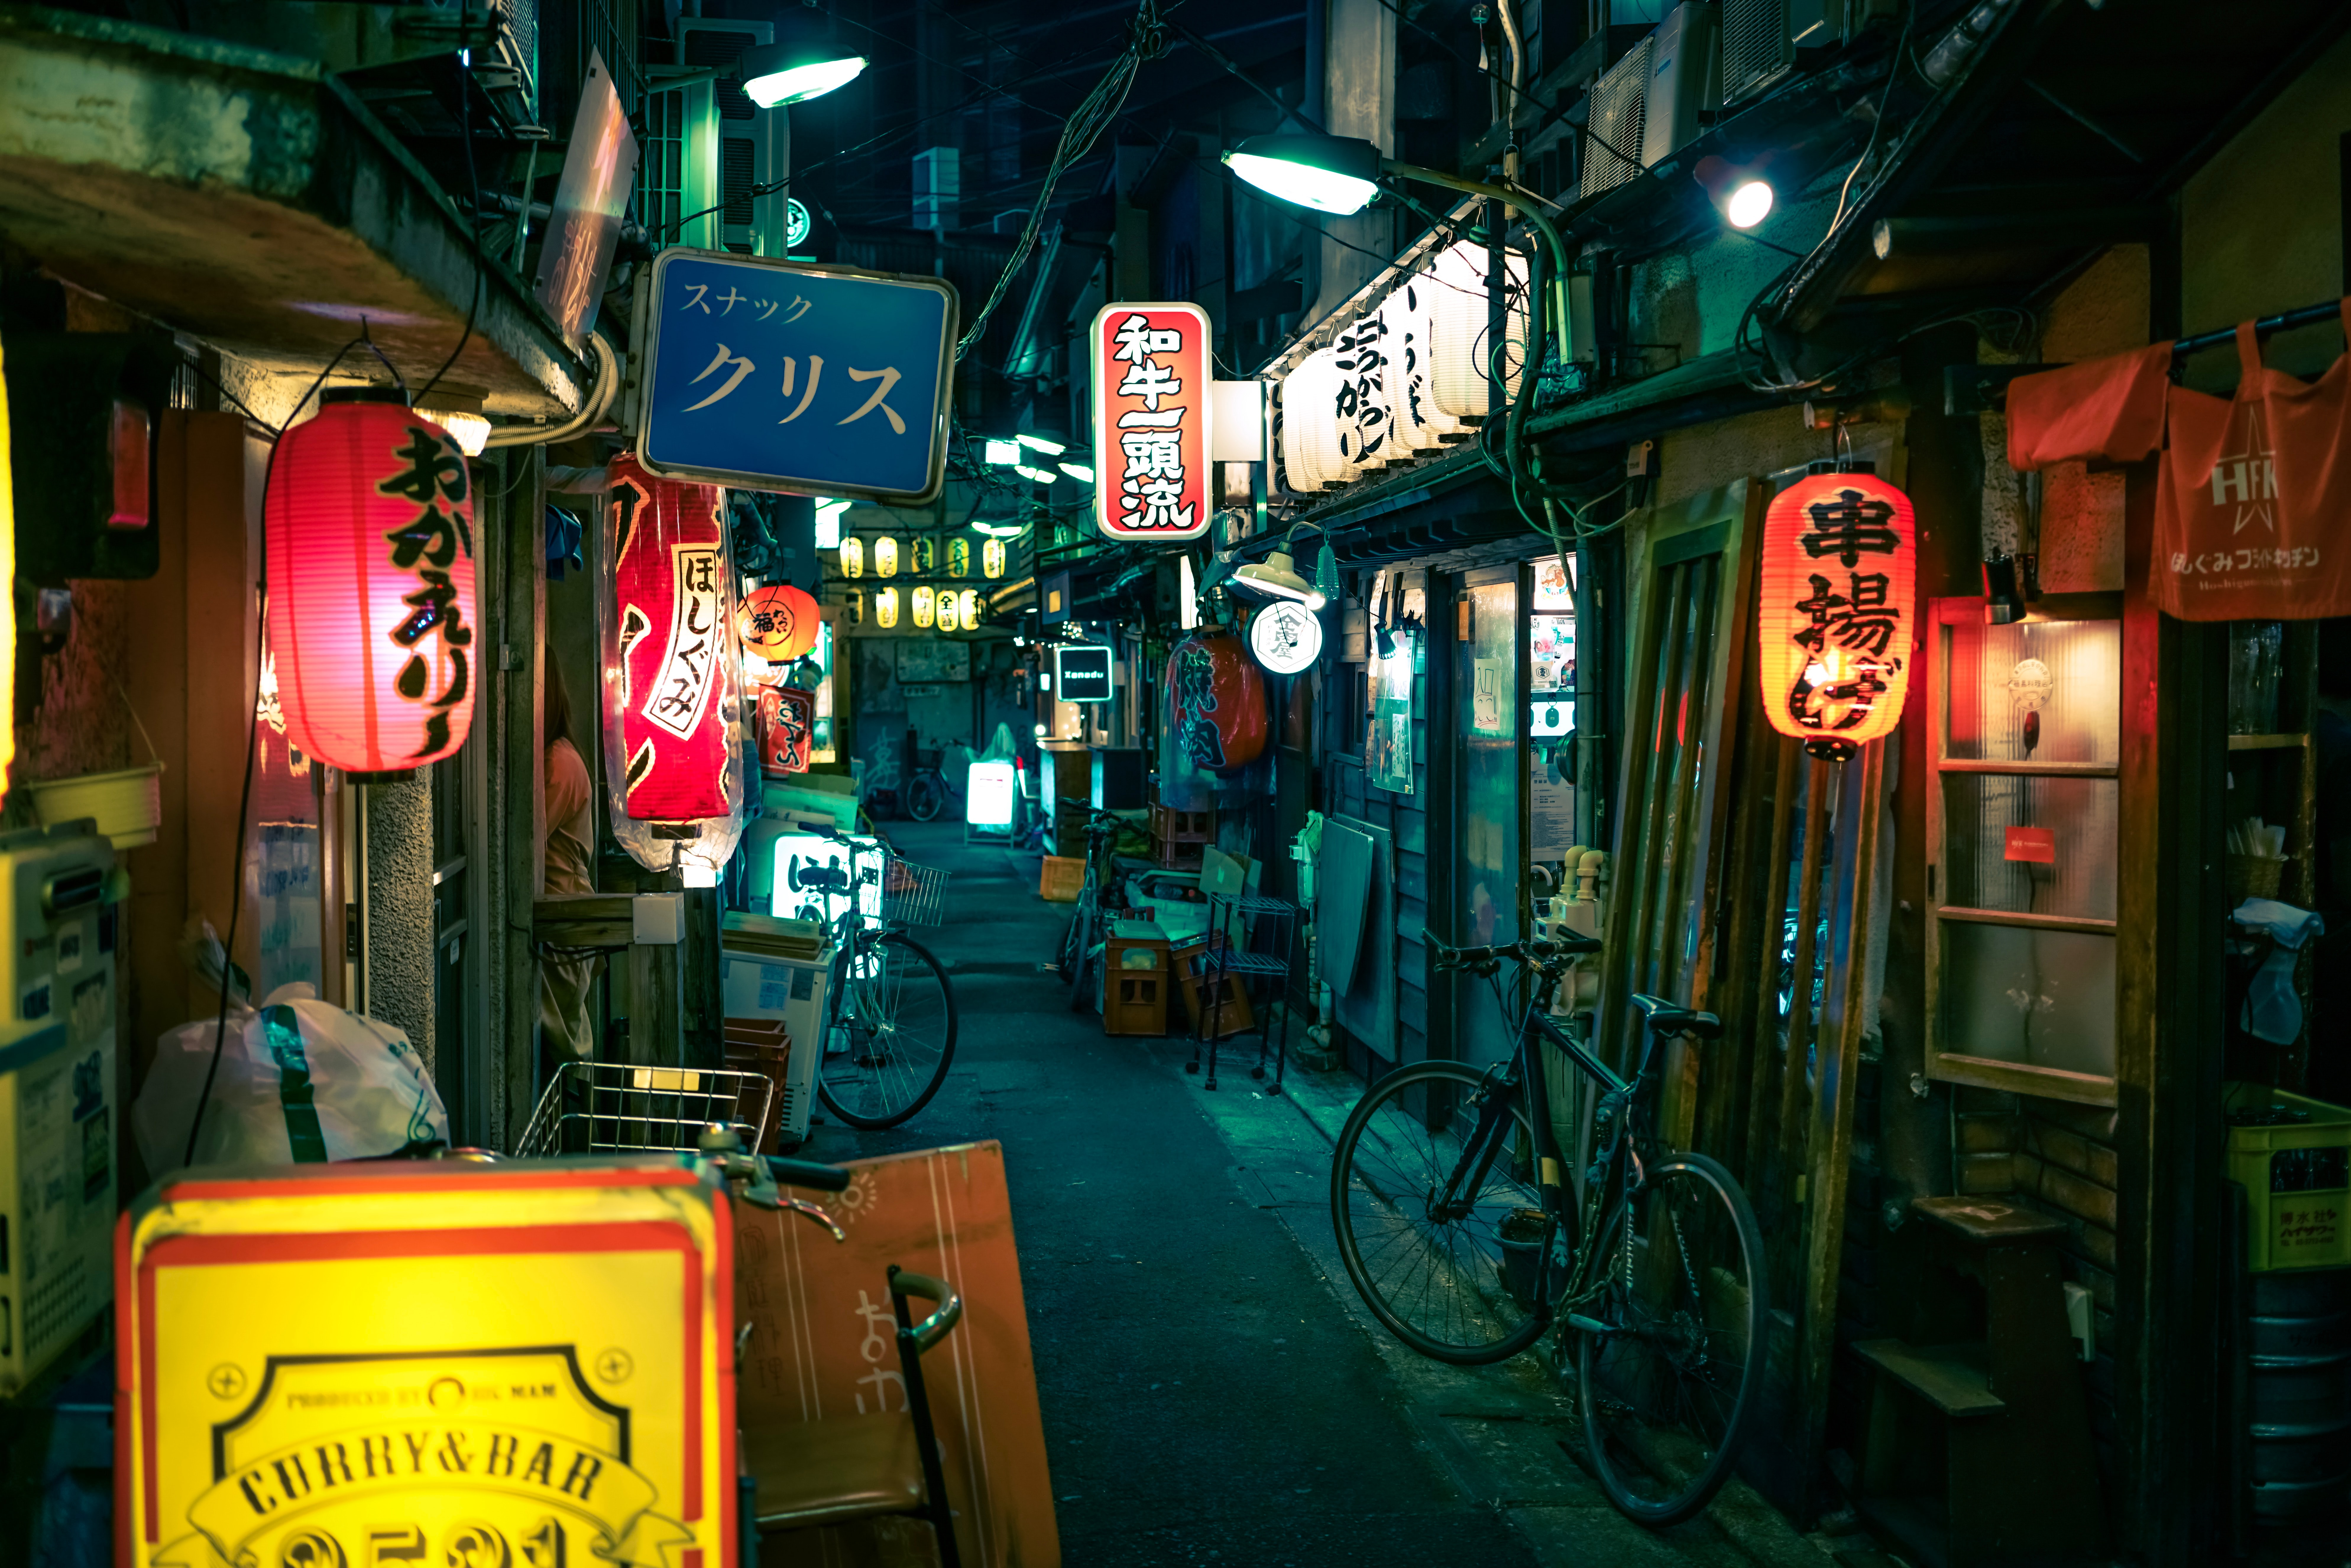![alt text](https://unsplash.com/photos/wfwUpfVqrKU)

### Detect Landmarks:

Documentation : https://cloud.google.com/vision/docs/detecting-landmarks



In [14]:
# Detect Landmarks:

def landmarkDetection(uri):
    """Detects logos in the file located in Google Cloud Storage or on the Web.
    """
    # Imports the Google Cloud client library
    from google.cloud import vision_v1
    from google.cloud.vision_v1 import types
    
    client = vision_v1.ImageAnnotatorClient()
    image = vision_v1.types.Image()
    image.source.image_uri = uri

    response = client.landmark_detection(image=image)
       
   # print(response) #Uncomment this line, to get a more detailed response!  
    landmarks = response.landmark_annotations
    print('Landmark:')

    for landmark in landmarks:
        print(landmark.description)
        
landmarkDetection("gs://cloud-samples-data/vision/landmark/st_basils.jpeg")

Landmark:
Saint Basil's Cathedral
St. Basil's Cathedral


![alt text](https://images.unsplash.com/photo-1513326738677-b964603b136d?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=449&q=80)

### Detect multiple objects :


In [26]:
def localize_objects_uri(uri):
    """Localize objects in the image on Google Cloud Storage

    Args:
    uri: The path to the file in Google Cloud Storage (gs://...)
    """
    from google.cloud import vision
    client = vision.ImageAnnotatorClient()

    image = vision.Image()
    image.source.image_uri = uri

    objects = client.object_localization(
        image=image).localized_object_annotations

    print('Number of objects found: {}'.format(len(objects)))
    for object_ in objects:
        print('\n{} (confidence: {})'.format(object_.name, object_.score))
        print('Normalized bounding polygon vertices: ')
        for vertex in object_.bounding_poly.normalized_vertices:
            print(' - ({}, {})'.format(vertex.x, vertex.y))

In [28]:
{
  "requests": [
    {
      "features": [
        {
          "maxResults": 10,
          "type": "OBJECT_LOCALIZATION"
        }
      ],
      "image": {
        "source": {
          "imageUri": "https://cloud.google.com/vision/docs/images/bicycle_example.png"
        }
      }
    }
  ]
}

{'requests': [{'features': [{'maxResults': 10, 'type': 'OBJECT_LOCALIZATION'}],
   'image': {'source': {'imageUri': 'https://cloud.google.com/vision/docs/images/bicycle_example.png'}}}]}

In [29]:
localize_objects_uri("https://cloud.google.com/vision/docs/images/bicycle_example.png")

Number of objects found: 4

Bicycle wheel (confidence: 0.9425086975097656)
Normalized bounding polygon vertices: 
 - (0.31517794728279114, 0.7865116596221924)
 - (0.4419495761394501, 0.7865116596221924)
 - (0.4419495761394501, 0.9693962931632996)
 - (0.31517794728279114, 0.9693962931632996)

Bicycle wheel (confidence: 0.9341650009155273)
Normalized bounding polygon vertices: 
 - (0.5033941268920898, 0.755299985408783)
 - (0.6290013790130615, 0.755299985408783)
 - (0.6290013790130615, 0.9428197741508484)
 - (0.5033941268920898, 0.9428197741508484)

Bicycle (confidence: 0.9013836979866028)
Normalized bounding polygon vertices: 
 - (0.3161414563655853, 0.6644622683525085)
 - (0.6335362195968628, 0.6644622683525085)
 - (0.6335362195968628, 0.9687421321868896)
 - (0.3161414563655853, 0.9687421321868896)

Picture frame (confidence: 0.7142972350120544)
Normalized bounding polygon vertices: 
 - (0.7882673740386963, 0.16615547239780426)
 - (0.9662207961082458, 0.16615547239780426)
 - (0.9662207

![alt text](https://cloud.google.com/vision/docs/images/bicycle_example.png)